In [1]:
import h5py
import numpy as np
from scipy.stats import mode
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Loading test dataset

In [3]:
pred_file = h5py.File('predictions.hdf5')

In [4]:
f_test = h5py.File('multimodal_train.hdf5')

In [5]:
y_true_img = f_test['y_img'][:]

In [6]:
y_true_sns = f_test['y_sns'][:]

In [7]:
pred_img = np.argmax(pred_file['pred_img'][:],axis=1).reshape(int(18000/15), 15, 1)

In [8]:
pred_img = np.asarray([mode(arr.flatten())[0][0] for arr in pred_img])

In [9]:
pred_sns = pred_file['pred_sns'][:]

## Checking Accuracies

In [10]:
acc_sns = float(((pred_sns == y_true_sns).sum()/1200)*100)

In [11]:
acc_img = float(((pred_img == y_true_img).sum()/1200)*100)

## Comparing Predictions

In [12]:
targets = ['walking', 'walking upstairs', 'walking downstairs', 'rid.elevator up',
                    'rid.elevator down', 'rid.escalator up', 'rid.escalator down', 'sitting',
                    'eating', 'drinking', 'texting', 'mak.phone calls',
                    'working at PC', 'reading', 'writting sentences', 'organizing files',
                    'running', 'doing push-ups', 'doing sit-ups', 'cycling']

In [13]:
def plot_confusion_matrix(y_true, y_pred, target_names, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index=target_names, columns=target_names).round(2)
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index=target_names, columns=target_names).round(2)
    plt.figure(figsize = (12,7))
    hm = sns.heatmap(df_cm, annot=True)
    hm.axes.set_title(title)
    hm.axes.set_xlabel("Predicted")
    hm.axes.set_ylabel("True")

### Sensor Overall Accuracy

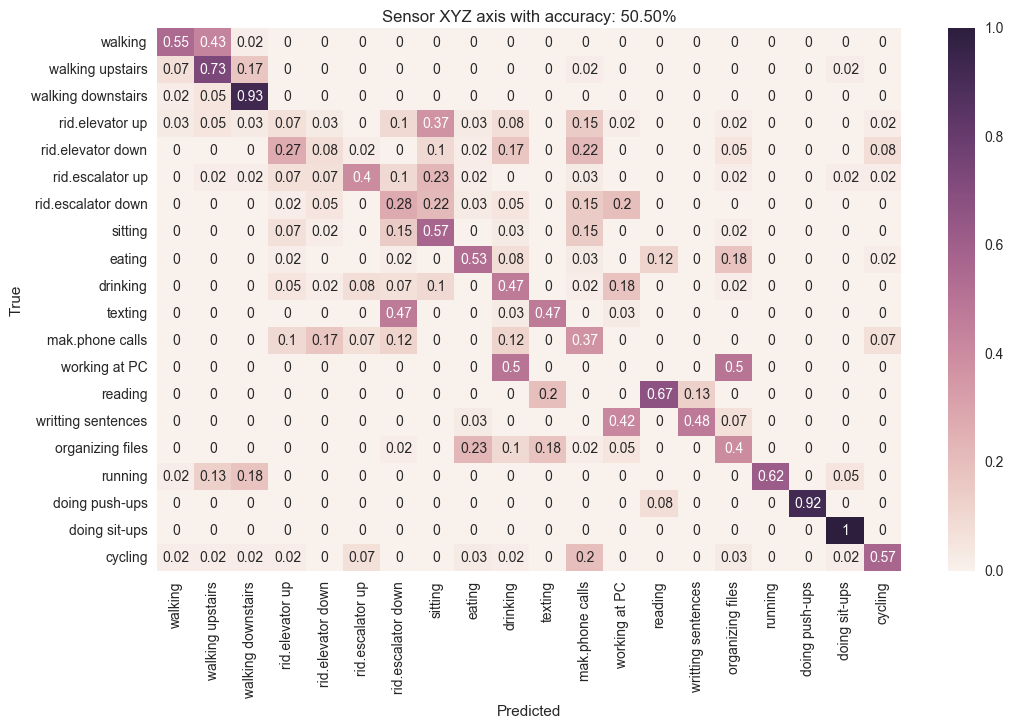

In [14]:
plot_confusion_matrix(y_true_sns, pred_sns, targets, title='Sensor XYZ axis with accuracy: %.2f%%' % acc_sns)

### Image overall accuracy

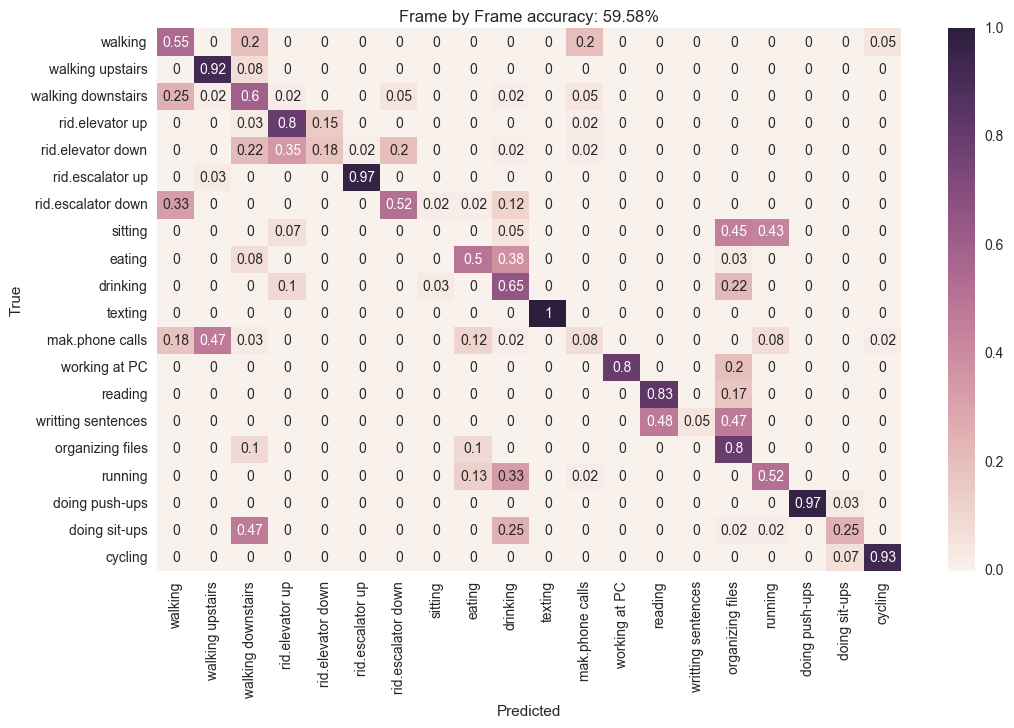

In [15]:
plot_confusion_matrix(y_true_img, pred_img, targets, title='Frame by Frame accuracy: %.2f%%' % acc_img)

### Getting the true indexes for the Sensors

In [16]:
ix_sns = [ix for ix, arr in enumerate(pred_sns) if pred_sns[ix] == y_true_sns[ix]]

### Calculating the Vision accuracy with respect to the Sensor accuracy

In [17]:
vision_acc_wrt_sns = ((pred_sns[ix_sns] == pred_img[ix_sns]).sum()/len(ix_sns)) * 100

### Setting the y_true to be the sensor data and compare it with the vision

In [18]:
targets_sns = ['walking', 'walking upstairs', 'walking downstairs', 'rid.elevator up',
                    'rid.elevator down', 'rid.escalator up', 'rid.escalator down', 'sitting',
                    'eating', 'drinking', 'texting', 'mak.phone calls', 
                    'reading', 'writting sentences', 'organizing files',
                    'running', 'doing push-ups', 'doing sit-ups', 'cycling']

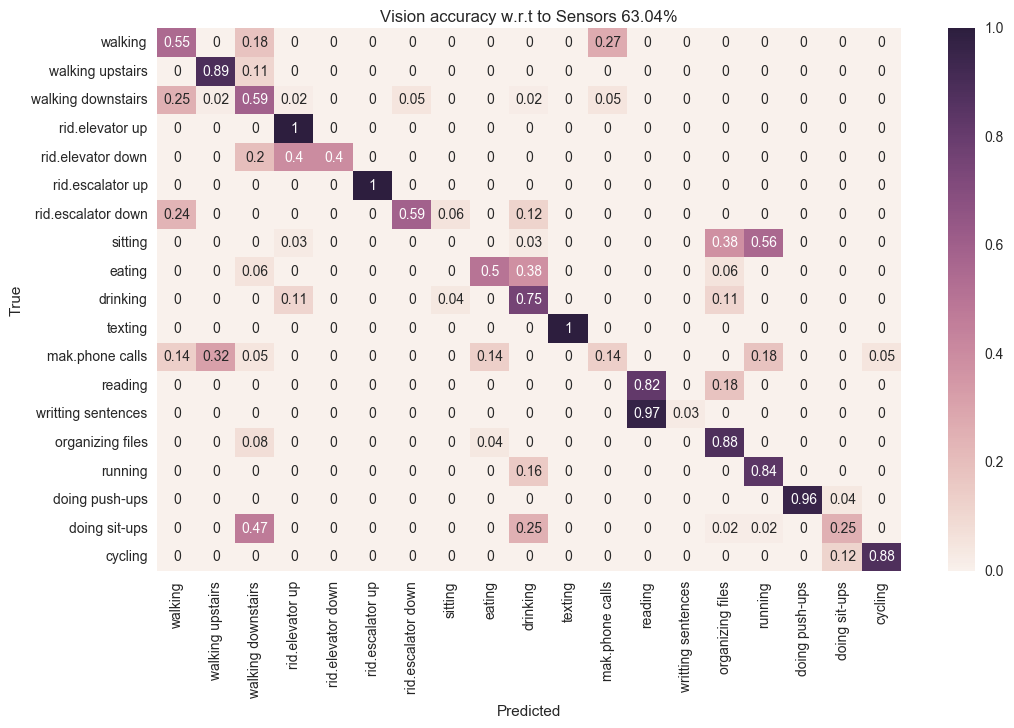

In [19]:
plot_confusion_matrix(pred_sns[ix_sns],pred_img[ix_sns],target_names=targets_sns,
                      title='Vision accuracy w.r.t to Sensors %.2f%%' % vision_acc_wrt_sns)

### Getting the true indexes for the Vision

In [20]:
ix_img = [ix for ix, arr in enumerate(pred_img) if pred_img[ix] == y_true_img[ix]]

### Calculating the Sensor accuracy with respect to the Vision Accuracy

In [21]:
sns_acc_wrt_vision = ((pred_sns[ix_img] == pred_img[ix_img]).sum()/len(ix_img)) * 100

### Setting the y_true to be the vision data and compare it with the sensor

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in true_divide


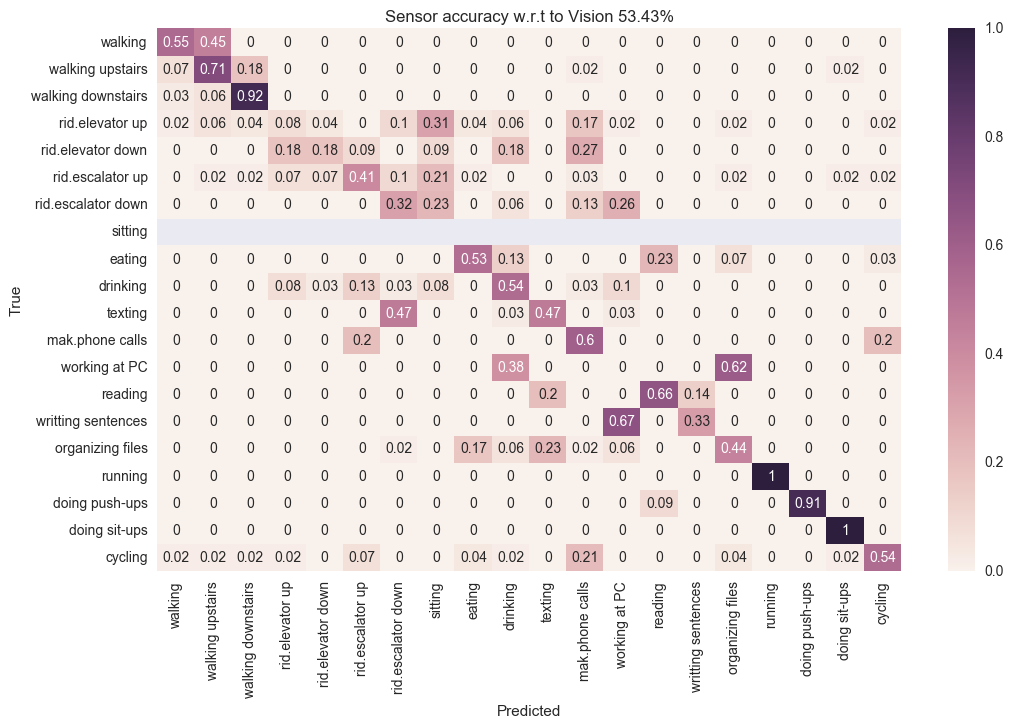

In [22]:
plot_confusion_matrix(pred_img[ix_img],pred_sns[ix_img],target_names=targets,
                      title='Sensor accuracy w.r.t to Vision %.2f%%' % sns_acc_wrt_vision)